In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp


<h1>  Basic </h1>
<h3>  Optimization </h3>

In [3]:
from scipy.optimize import minimize

$ Minimize $   $ f(x) = (x-3)^2     $

In [4]:
def f(x):
    return (x-3)**2

res = minimize(f, 4)
res

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.551463867949274e-17
        x: [ 3.000e+00]
      nit: 2
      jac: [-4.681e-13]
 hess_inv: [[ 5.000e-01]]
     nfev: 6
     njev: 3

$ Minimize $   $f(x,y) = (x-1)^2+(y-2.5)^2  $ 

$$  x-2y+2 {\geq} 0  $$
$$  -x-2y+6 {\geq} 0  $$
$$  -x+2y+2 {\geq} 0  $$
$$  x {\geq} 0  $$
$$  y {\geq} 0  $$

In [5]:
#Defining function
f = lambda x: (x[0]-1)**2 + (x[1]-2.5)**2

#Defining constrain

constrain =( 
        {'type' : 'ineq', 'fun' : lambda x: x[0] - 2*x[1] + 2 },
        {'type' : 'ineq', 'fun' : lambda x: -x[0] - 2*x[1] + 6 },
        {'type' : 'ineq', 'fun' : lambda x: -x[0] + 2*x[1] + 2 },
)

#Defining bounds

bnds = ((0, None), (0, None))  #The first intern parenthesis means:  'x' goes from 0 to infinity, while the second: 'y' goes from 0 to infinity


res = minimize(f, (34,5), bounds= bnds , constraints=constrain  )
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.8000000000000013
       x: [ 1.400e+00  1.700e+00]
     nit: 5
     jac: [ 8.000e-01 -1.600e+00]
    nfev: 15
    njev: 5

<h3> Documentation </h3>

In [6]:
#  minimize?

<h3> Interpolation </h3>

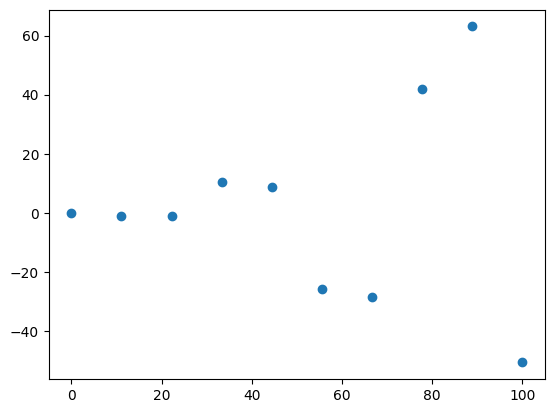

In [7]:
x = np.linspace(0,100,10)
y = x**2*np.sin(x)/100

plt.scatter(x,y)

You want to know the values in beetwen 

In [8]:
from scipy.interpolate import interp1d

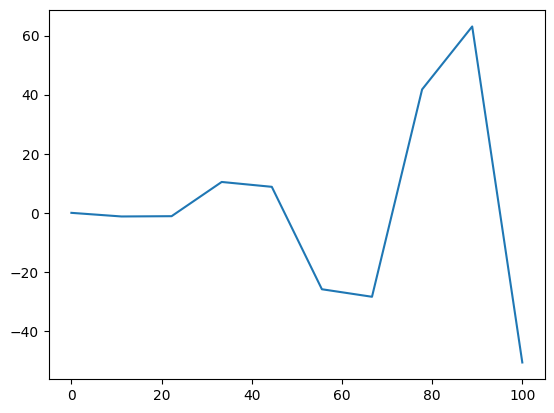

In [9]:
f = interp1d(x,y, kind='linear')

x_dense = np.linspace(0,100,100)
y_dense = f(x_dense)

plt.plot(x_dense, y_dense)

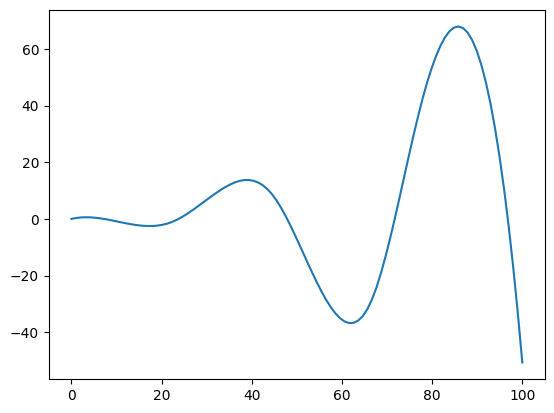

In [10]:
#Smoother
f = interp1d(x,y, kind='cubic')
x_dense = np.linspace(0,100,100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)

<h3> Curve Fitting </h3>

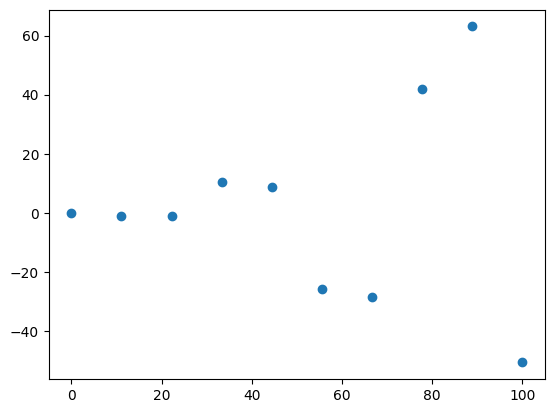

In [11]:
x_data = np.linspace(0, 10, 10)
y_data = x**2 + 3
plt.scatter(x,y)

You want to fit the latest data to a function of the form $ y=ax^2+bx+c $. The main goal is to obtain $a$ and $b$

In [12]:
from scipy.optimize import curve_fit

def func(x,a,b,c):
    return a*x**2+b*x+c

popt, pcov = curve_fit(func, x_data, y_data, p0 = (1,1,1) )   #popt: Polutaion of optimal parameters, pcov: Covariance of parameters
popt.round()

array([100.,   0.,   3.])

The equation of motion of a spring is: $y(t)=A\cos(\omega t-\phi )$

Imagine we have the following data that 'behaves' to fit the latest function

In [13]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

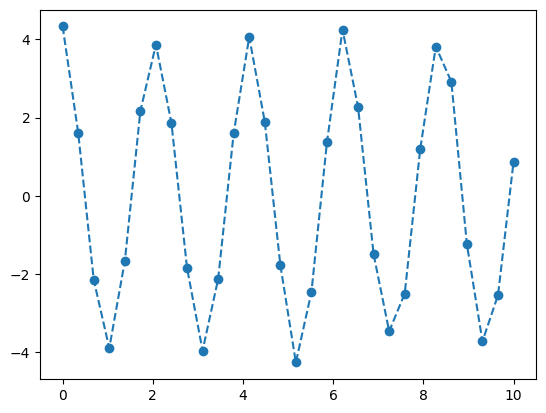

In [15]:
plt.plot(t_data, y_data, 'o--')

From yhe plot we can make a guess of the parameters, in this case: 

$\phi$: Since the plot it seems to start in the maximun we know that implies $\phi=2\pi n$ where $n$ is an integer, for simplicity lest set $n=0$ $\Rightarrow$ $\phi=0$ 

$A$: Since the values in the $y$-label seems to vary from $-4$ to $4$, we set $A=4$

$\omega$: From the plot we can deduce that the period $T$ (The time necesary for the system to repeat its self) of the function is approx $2$ seconds (the fisrt minimun appaerst to happend in the second $1$ and the next minimun in the second $3$), in the other hand we know that $f=1/T$  $(f= 1/2)$ and $2\pi \omega  =f$ we can deduce, $\omega \approx 2\pi (1/2)=\pi$

In [18]:
#Fitting the data

def f( t, A, w, phi  ):
    return A*np.cos(w*t + phi)

popt, pcov = curve_fit(f, t_data, y_data, p0=( 4, np.pi, 0  ) )

In [19]:
popt

array([3.94836219, 2.99899521, 0.10411352])

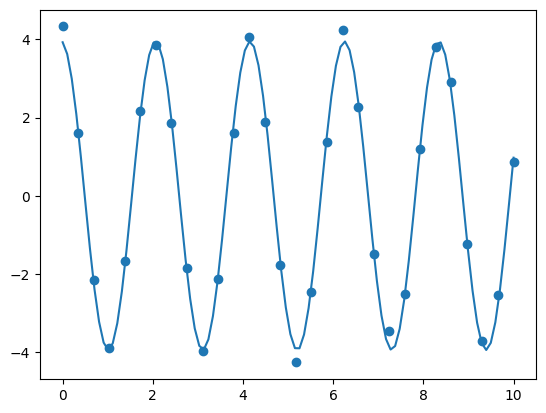

In [27]:
t = np.linspace(0,10,100)
y = popt[0] * np.cos( popt[1]*t +popt[2] )


plt.scatter(t_data, y_data)
plt.plot( t,y)

The error in the parameters we con obtain them from the folllowing command. 'pcov' is a matrix that represents the relation of errors in the dependence of the values, the doagonal terms of the matrix represent the errors that exits in the parameters obtained, so we use $diag$ from $numpy$.

In [29]:
np.sqrt(np.diag(pcov))

array([0.05117448, 0.00430857, 0.02575701])


We need to make good gueses otherwise we obtain strange values. For example, lets set $\omega = 1$ and lets see what happens. 


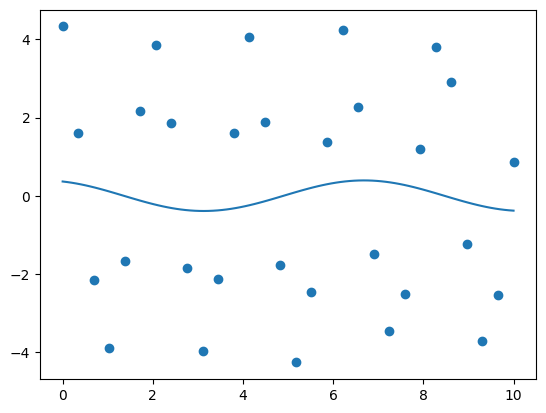

In [30]:
#Fitting the data

def f( t, A, w, phi  ):
    return A*np.cos(w*t + phi)

popt, pcov = curve_fit(f, t_data, y_data, p0=( 4, 1, 0  ) )

t = np.linspace(0,10,100)
y = popt[0] * np.cos( popt[1]*t +popt[2] )


plt.scatter(t_data, y_data)
plt.plot( t,y)

${\huge Nonsence}$